In [3]:
from collections import defaultdict
import pandas as pd
import pickle as pkl
import os


def get_evidence_df(ann_folder):
    rows = {}
    for filename in os.listdir(ann_folder):
        with open(os.path.join(ann_folder, filename), 'rb') as f:
            d = pkl.load(f)
            instance_data = next(iter(d.values()))
            anns = instance_data['model_anns']
            if len(anns) > 0:
                assert len(anns) == 1
                model_type = next(iter(anns.keys()))
                anns['model_type'] = model_type
                model_anns = anns[model_type]
                if len(model_anns) > 0:
                    assert len(model_anns['sort_by_model_order']) == 1
                    sort_type = model_anns['sort_by_model_order'][0]
                    anns['sort_type'] = sort_type
                    del model_anns['sort_by_model_order']
                    model_anns['evidence_anns'] = model_anns['evidence_anns'][sort_type]
                    anns.update(model_anns)
                del anns[model_type]
            del instance_data['model_anns']
            instance_data.update(instance_data['info'])
            del instance_data['info']
            instance_data.update(anns)
            rows.update(d)
    return pd.DataFrame(rows).transpose().sort_index()


def get_full_evidence_df(ann_dirs):
    dfs = defaultdict(lambda : pd.DataFrame([]))
    for ann_dir in ann_dirs:
        date = '_'.join(ann_dir.split('/')[-2].split('_')[1:])
        for split in os.listdir(ann_dir):
            for annotator in os.listdir(os.path.join(ann_dir, split)):
                df = get_evidence_df(os.path.join(ann_dir, split, annotator))
                df['annotator'] = [annotator] * len(df)
                df['date'] = [date] * len(df)
                dfs[split] = pd.concat([dfs[split], df])
    dfs = {split: df.reset_index() for split, df in dfs.items()}
    annotator_instance_repeats = defaultdict(lambda: [])
    for split, df in dfs.items():
        annotations_to_remove = set()
        for annotator in set(df.annotator):
            annotator_df = df[df.annotator == annotator]
            for instance in set(annotator_df.instance):
                annotator_instance_df = annotator_df[
                    annotator_df.instance == instance]
                if len(annotator_instance_df) > 1:
                    annotator_instance_repeats[split].append(annotator_instance_df)
                    annotations_to_remove.update(set(annotator_instance_df[1:].index))
        dfs[split] = df.drop(index=list(annotations_to_remove))
    return dfs, dict(annotator_instance_repeats)


In [4]:
dfs, annotator_instance_repeats = get_full_evidence_df([
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_9-29-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-3-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-9-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-14-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-16-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-17-23/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-20-23/annotations',
    # '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-20-23_extra/annotations',
    '/work/frink/mcinerney.de/ehr-diagnosis-annotations/annotations_11-21-23/annotations',])

In [5]:
print(annotator_instance_repeats.keys())
# print(len(annotator_instance_repeats['val2']))
# annotator_instance_repeats['val2'][0]

dict_keys([])


In [6]:
# dfs['val2'][dfs['val2'].instance == "val2 Instance 69 (patient 11480, 158 reports)"]

In [7]:
dfs['val2']['evidence_anns'].iloc[0]

{10: {'cancer': {'relevance': '1 - Weak Correlation', 'impact': 'Yes'},
  'pneumonia': {'relevance': '1 - Weak Correlation', 'impact': 'Yes'},
  'pulmonary edema': {'relevance': '1 - Weak Correlation', 'impact': 'Yes'},
  'evidence_was_seen': 'Yes',
  'notes': 'Only one piece of relevant evidence because huge gap in the medical record between recent report and past reports.',
  'evidence': {'score': '0.96',
   'evidence': "The liver is nodular and coarse in echotexture, consistent with patient's history of known cirrhosis. The gallbladder wall is thickened, with a dependent gallstone within it. A moderate amount of",
   'query': 'cancer (diagnosis)',
   'day': -387,
   'report_number': '20'},
  'sorted_idx': 0,
  'evidence_distribution': [2.884256362915039,
   -2.276189088821411,
   -1.170615315437317]}}

In [8]:
dfs['val2']

,index,obs,timestep,num_reports,instance,time_for_initial_assesment,seen_targets,option_likelihood_anns,max_timesteps,true_positives,...,options,selected_options,option_likelihood_anns2,concluding_notes,invalid_instance_notes,annotator,date,action,visited_reports,visited_report_timestamps
0,0,"{'options': 'option,type cancer,diagnosis pneu...",1,26,"val2 Instance 50 (patient 11755, 122 reports)",168.272657,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",19,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Andrea,9-29-23,NaN,NaN,NaN
1,1,"{'options': 'option,type cancer,diagnosis pneu...",1,42,"val2 Instance 51 (patient 7470, 53 reports)",189.534721,{pulmonary edema (diagnosis)},NaN,21,None,...,NaN,NaN,NaN,NaN,,Andrea,9-29-23,NaN,NaN,NaN
2,2,"{'options': 'option,type cancer,diagnosis pneu...",1,1,"val2 Instance 52 (patient 83375, 8 reports)",24.683878,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",7,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Andrea,9-29-23,NaN,NaN,NaN
3,3,"{'options': 'option,type cancer,diagnosis pneu...",1,2,"val2 Instance 53 (patient 94023, 4 reports)",29.90608,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",3,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Andrea,9-29-23,NaN,NaN,NaN
4,4,"{'options': 'option,type cancer,diagnosis pneu...",1,2,"val2 Instance 54 (patient 26310, 32 reports)",46.365206,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",3,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Andrea,9-29-23,NaN,NaN,NaN
5,5,"{'options': 'option,type cancer,diagnosis pneu...",1,24,"val2 Instance 55 (patient 5255, 25 reports)",158.251378,{cancer (diagnosis)},NaN,1,None,...,NaN,NaN,NaN,NaN,,Andrea,9-29-23,NaN,NaN,NaN
6,1,"{'options': 'option,type cancer,diagnosis pneu...",1,12,"val2 Instance 67 (patient 1973, 36 reports)",45.904525,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",39,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Andrea,11-3-23,"[-3.8275794982910156, -1.8324410915374756, -1....",NaN,NaN
7,2,"{'options': 'option,type cancer,diagnosis pneu...",1,10,"val2 Instance 69 (patient 11480, 158 reports)",155.551828,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",295,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Andrea,11-3-23,"[-5.879974842071533, -1.8629225492477417, -2.7...",NaN,NaN
8,3,"{'options': 'option,type cancer,diagnosis pneu...",1,11,"val2 Instance 76 (patient 7097, 16 reports)",98.346124,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",9,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Andrea,11-3-23,"[-4.060123443603516, -2.017209529876709, -1.12...",NaN,NaN
9,4,"{'options': 'option,type cancer,diagnosis pneu...",1,17,"val2 Instance 85 (patient 19303, 52 reports)",89.775001,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",15,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...","History of CHF, should we mark it as confident...",NaN,Andrea,11-3-23,"[-2.4307668209075928, -2.5343399047851562, -1....",NaN,NaN


In [9]:

dfs['val2'][dfs['val2'].instance == "val2 Instance 69 (patient 11480, 158 reports)"]

,index,obs,timestep,num_reports,instance,time_for_initial_assesment,seen_targets,option_likelihood_anns,max_timesteps,true_positives,...,options,selected_options,option_likelihood_anns2,concluding_notes,invalid_instance_notes,annotator,date,action,visited_reports,visited_report_timestamps
7,2,"{'options': 'option,type cancer,diagnosis pneu...",1,10,"val2 Instance 69 (patient 11480, 158 reports)",155.551828,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",295,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,Andrea,11-3-23,"[-5.879974842071533, -1.8629225492477417, -2.7...",NaN,NaN
15,0,"{'options': 'option,type cancer,diagnosis pneu...",1,10,"val2 Instance 69 (patient 11480, 158 reports)",271.838545,{},"{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",295,None,...,"[cancer (diagnosis), pneumonia (diagnosis), pu...","[0, 1, 2]","{'cancer (diagnosis)': 'Unlikely', 'pneumonia ...",,NaN,William,11-3-23,"[-3.64162540435791, -2.0485668182373047, -1.93...",NaN,NaN


In [10]:
from collections import defaultdict
def get_processed_annotations(df, remove_duplicates=True):
    new_rows = []
    for i, row in df.iterrows():
        new_rows.append({
            'annotator': row['annotator'],
            'instance_index': row['instance_index'],
            'num_reports': row['num_reports'],
            'model_type': row['model_type'],
            'sort_type': row['sort_type'],
            'prediction_aligns': 1 if row['prediction_aligns'] == 'Yes' else 0 if row['prediction_aligns'] == row['prediction_aligns'] else None,
            'time_for_initial_assesment': row['time_for_initial_assesment'],
        })
        if row['options'] == row['options']:
            for condition in row['options']:
                condition = condition.split(' (')[0]
                new_rows[-1][condition + ' in future'] = condition in row['future_true_positives']
            evidence_anns = sorted([{'idx': k, **v} for k, v in row['evidence_anns'].items()], key=lambda x: x['sorted_idx'])
            new_evidence_anns = defaultdict(lambda: [])
            new_rows[-1]['num_annotated_evidence'] = len(evidence_anns)
            for x in evidence_anns:
                is_duplicate = 'duplicate' in x['notes'].lower() \
                    if 'notes' in x.keys() else False
                if remove_duplicates and is_duplicate:
                    continue
                new_evidence_anns['is_duplicate'].append(is_duplicate)
                new_evidence_anns['notes'].append(
                    x['notes'] if 'notes' in x.keys() else None)
                evidence_info = x['evidence']
                for k, v in evidence_info.items():
                    new_evidence_anns[k].append(v)
                new_evidence_anns['evidence_was_seen'].append(
                    x['evidence_was_seen'] if 'evidence_was_seen' in x.keys()
                    else None)
                for condition in row['options']:
                    condition = condition.split(' (')[0]
                    new_evidence_anns[condition + ' relevance'].append(int(
                        x[condition]['relevance'].split()[0]))
                    new_evidence_anns[condition + ' impact'].append(
                        x[condition]['impact'] if 'impact' in x[condition].keys()
                        else None)
            new_rows[-1].update(new_evidence_anns)
        if row['option_likelihood_anns'] == row['option_likelihood_anns']:
            new_rows[-1].update({k.split(' (')[0]: v for k, v in row['option_likelihood_anns'].items()})
            new_rows[-1].update({k.split(' (')[0] + '(changed)': v for k, v in row['option_likelihood_anns2'].items() if v != row['option_likelihood_anns'][k]})
    new_df = pd.DataFrame(new_rows)
    return new_df


In [11]:
processed_df = get_processed_annotations(dfs['val2'])
processed_df

,annotator,instance_index,num_reports,model_type,sort_type,prediction_aligns,time_for_initial_assesment,cancer in future,pneumonia in future,pulmonary edema in future,...,cancer impact,pneumonia relevance,pneumonia impact,pulmonary edema relevance,pulmonary edema impact,cancer,pneumonia,pulmonary edema,cancer(changed),pneumonia(changed)
0,Andrea,49,26,llm_evidence,LLM Confidence,1.0,168.272657,False,True,True,...,[Yes],[1],[Yes],[1],[Yes],Unlikely,Somewhat likely,Somewhat likely,NaN,NaN
1,Andrea,50,42,llm_evidence,NaN,NaN,189.534721,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Andrea,51,1,llm_evidence,LLM Confidence,0.0,24.683878,False,False,True,...,"[None, None]","[1, 0]","[No, None]","[1, 0]","[No, None]",Unlikely,Unlikely,Unlikely,NaN,NaN
3,Andrea,52,2,llm_evidence,LLM Confidence,1.0,29.906080,False,False,False,...,"[None, None, None]","[0, 0, 0]","[None, None, None]","[0, 0, 0]","[None, None, None]",Unlikely,Unlikely,Somewhat likely,NaN,NaN
4,Andrea,53,2,llm_evidence,Sort by MSE with the bias logits,0.0,46.365206,False,False,True,...,[None],[1],[Yes],[1],[Yes],Unlikely,Unlikely,Unlikely,NaN,NaN
5,Andrea,54,24,llm_evidence,NaN,NaN,158.251378,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andrea,66,12,llm_evidence,LLM Confidence,1.0,45.904525,False,False,True,...,"[None, None, None]","[0, 0, 0]","[None, None, None]","[0, 0, 0]","[None, None, None]",Unlikely,Unlikely,Somewhat likely,NaN,NaN
7,Andrea,68,10,all_sentences,Sort by MSE with the bias logits,0.0,155.551828,False,False,False,...,"[None, None]","[1, 1]","[No, No]","[1, 1]","[No, Yes]",Unlikely,Unlikely,Somewhat likely,NaN,NaN
8,Andrea,75,11,all_sentences,Sort by MSE with the bias logits,0.0,98.346124,False,False,False,...,"[None, None, None, None, None]","[0, 0, 0, 0, 0]","[None, None, None, None, None]","[0, 0, 0, 0, 0]","[None, None, None, None, None]",Unlikely,Very likely,Unlikely,NaN,NaN
9,Andrea,84,17,llm_evidence,LLM Confidence,1.0,89.775001,False,False,True,...,"[None, None]","[0, 0]","[None, None]","[0, 0]","[None, None]",Unlikely,Unlikely,Unlikely,NaN,NaN


In [12]:
processed_df.keys()

Index(['annotator', 'instance_index', 'num_reports', 'model_type', 'sort_type',
       'prediction_aligns', 'time_for_initial_assesment', 'cancer in future',
       'pneumonia in future', 'pulmonary edema in future',
       'num_annotated_evidence', 'is_duplicate', 'notes', 'score', 'evidence',
       'query', 'day', 'report_number', 'evidence_was_seen',
       'cancer relevance', 'cancer impact', 'pneumonia relevance',
       'pneumonia impact', 'pulmonary edema relevance',
       'pulmonary edema impact', 'cancer', 'pneumonia', 'pulmonary edema',
       'cancer(changed)', 'pneumonia(changed)'],
      dtype='object')

In [13]:
evidence_df = []
for i, row in processed_df.iterrows():
    if row['evidence'] != row['evidence']:
        continue
    evidence_info_keys = [
        'notes', 'query', 'day', 'evidence_was_seen', 'cancer impact',
        'pneumonia impact', 'pulmonary edema impact', 'cancer relevance',
        'pneumonia relevance', 'pulmonary edema relevance']
    for j, evidence_info in enumerate(list(zip(*[
            row[key] if row[key] == row[key] else [None] * len(row['evidence'])
            for key in evidence_info_keys]))):
        # import pdb; pdb.set_trace()
        evidence_df.append({
            'annotator': row['annotator'],
            'model_type': row['model_type'],
            'sort_type': row['sort_type'],
            'instance_index': row['instance_index'],
        })
        evidence_df[-1].update({
            k: v for k, v in zip(evidence_info_keys, evidence_info)
            if v is not None})
        impact_keys = [
            x for x in [
                'cancer impact', 'pneumonia impact', 'pulmonary edema impact']
                if x in evidence_df[-1].keys()]
        if len(impact_keys) > 0:
            evidence_df[-1]['avg_impact'] = sum([
                evidence_df[-1][x]=='Yes' for x in impact_keys]) / len(impact_keys)
        relevance_keys = [
            x for x in [
                'cancer relevance', 'pneumonia relevance',
                'pulmonary edema relevance']
                if x in evidence_df[-1].keys()]
        if len(relevance_keys) > 0:
            evidence_df[-1]['Usefulness'] = max([
                evidence_df[-1][x] for x in relevance_keys])
        for usefulness, key in enumerate([
                'Not Relevant', 'Weak Correlation', 'Useful', 'Very Useful']):
            evidence_df[-1][key] = 1 \
                if usefulness == evidence_df[-1]['Usefulness'] else 0
        evidence_df[-1]['count'] = 1

    # all_notes = row['notes'] if row['notes'] == row['notes'] else [None] * len(row['evidence'])
    # all_queries = row['query'] if row['query'] == row['query'] else [None] * len(row['evidence'])
    # all_days = row['day'] if row['day'] == row['day'] else [None] * len(row['day'])
    # evidence_was_seen = row['evidence_was_seen'] if row['evidence_was_seen'] == row['evidence_was_seen'] else [None] * len(row['evidence_was_seen'])
    # impacts = {}
    # if row['cancer impact'] == row['cancer impact']:
    #     impacts['cancer'] = row['cancer impact']
    # if row['pneumonia impact'] == row['pneumonia impact']:
    #     impacts['pneumonia'] = row['pneumonia impact']
    # if row['pulmonary edema impact'] == row['pulmonary edema impact']:
    #     impacts['pulmonary edema'] = row['pulmonary edema impact']
    # keys = list(impacts.keys())
    # for j, (evidence, notes, query, day, evid_seen, impact) in enumerate(zip(
    #         row['evidence'], all_notes, all_queries, all_days,
    #         evidence_was_seen, zip(*[impacts[key] for key in keys]))):
    #     evidence_df.append({
    #         'annotator': row['annotator'],
    #         'model_type': row['model_type'],
    #         'sort_type': row['sort_type'],
    #         'instance_index': row['instance_index'],
    #         'notes': notes,
    #         'evidence': evidence,
    #         'query': query,
    #         'day': day,
    #         'evidence_was_seen': evid_seen,
    #     })
    #     keys_temp = [k for k, im in zip(keys, impact) if im is not None]
    #     impact_temp = [1 if im=='Yes' else 0 for im in impact if im is not None]
    #     if len(impact_temp) > 0:
    #         avg_impact = sum(impact_temp) / len(impact_temp)
    #         evidence_df[-1]['avg_impact'] = avg_impact
    #         for key, im in zip(keys_temp, impact_temp):
    #             evidence_df[-1][key + ' impact'] = im
evidence_df = pd.DataFrame(evidence_df)
evidence_df['model'] = evidence_df.apply(lambda r: str((r.model_type, r.sort_type)), axis=1)
evidence_df

,annotator,model_type,sort_type,instance_index,notes,query,day,evidence_was_seen,cancer impact,pneumonia impact,...,pneumonia relevance,pulmonary edema relevance,avg_impact,Usefulness,Not Relevant,Weak Correlation,Useful,Very Useful,count,model
0,Andrea,llm_evidence,LLM Confidence,49,Only one piece of relevant evidence because hu...,cancer (diagnosis),-387,Yes,Yes,Yes,...,1,1,1.0,1,0,1,0,0,1,"('llm_evidence', 'LLM Confidence')"
1,Andrea,llm_evidence,LLM Confidence,51,,pulmonary edema (diagnosis),0,Yes,NaN,No,...,1,1,0.0,1,0,1,0,0,1,"('llm_evidence', 'LLM Confidence')"
2,Andrea,llm_evidence,LLM Confidence,51,,pneumonia (diagnosis),0,NaN,NaN,NaN,...,0,0,NaN,0,1,0,0,0,1,"('llm_evidence', 'LLM Confidence')"
3,Andrea,llm_evidence,LLM Confidence,52,,pulmonary edema (diagnosis),-15,NaN,NaN,NaN,...,0,0,NaN,0,1,0,0,0,1,"('llm_evidence', 'LLM Confidence')"
4,Andrea,llm_evidence,LLM Confidence,52,,tiredness (risk factor),-15,NaN,NaN,NaN,...,0,0,NaN,0,1,0,0,0,1,"('llm_evidence', 'LLM Confidence')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Lucy,llm_evidence,Sort by MSE with the bias logits,84,,cancer (diagnosis),-335,Yes,Yes,NaN,...,0,0,1.0,1,0,1,0,0,1,"('llm_evidence', 'Sort by MSE with the bias lo..."
125,Lucy,llm_evidence,Sort by MSE with the bias logits,84,"Kind of a weird statement to make, almost like...",cancer (diagnosis),-336,No,No,NaN,...,0,0,0.0,1,0,1,0,0,1,"('llm_evidence', 'Sort by MSE with the bias lo..."
126,Lucy,llm_evidence,LLM Confidence,86,,a heart attack (risk factor),-1,NaN,NaN,NaN,...,0,0,NaN,0,1,0,0,0,1,"('llm_evidence', 'LLM Confidence')"
127,Lucy,llm_evidence,LLM Confidence,86,,neuralogical problems (risk factor),0,NaN,NaN,NaN,...,0,0,NaN,0,1,0,0,0,1,"('llm_evidence', 'LLM Confidence')"


In [14]:
print(evidence_df[evidence_df.instance_index==75].iloc[-2])
print(evidence_df[evidence_df.instance_index==75].iloc[-1])

annotator                                                  Lucy
model_type                                         llm_evidence
sort_type                                        LLM Confidence
instance_index                                               75
notes                                                          
query                                  chest pain (risk factor)
day                                                          -1
evidence_was_seen                                            No
cancer impact                                                No
pneumonia impact                                             No
pulmonary edema impact                                       No
cancer relevance                                              1
pneumonia relevance                                           2
pulmonary edema relevance                                     2
avg_impact                                                  0.0
Usefulness                              

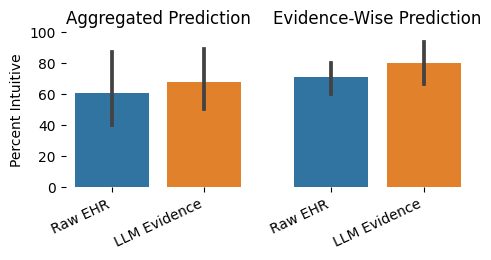

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(4.9, 2.7), sharey=True)
processed_df_temp = processed_df.copy()
models = {'llm_evidence': 'LLM Evidence', 'all_sentences': 'Raw EHR'}
processed_df_temp['model_type'] = processed_df_temp['model_type'].apply(
    lambda x: models[x])
processed_df_temp = processed_df_temp.groupby(['annotator', 'model_type']).agg({'prediction_aligns': np.mean}).reset_index()
processed_df_temp['prediction_aligns'] = processed_df_temp['prediction_aligns'] * 100
processed_df_temp = pd.concat([processed_df_temp[processed_df_temp.model_type == mt] for mt in ['Raw EHR', 'LLM Evidence']])
sns.barplot(data=processed_df_temp.rename(columns={'prediction_aligns': 'Percent Intuitive', 'model_type': 'Model'}), y='Percent Intuitive', x='Model', ax=axs[0])
axs[0].set_title('Aggregated Prediction', fontsize=12)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].set_xlabel('')
evidence_df_temp = evidence_df.copy()
evidence_df_temp['model_type'] = evidence_df_temp['model_type'].apply(
    lambda x: models[x])
evidence_df_temp = evidence_df_temp.groupby(['annotator', 'model_type']).agg({'avg_impact': np.mean}).reset_index()
evidence_df_temp['avg_impact'] = evidence_df_temp['avg_impact'] * 100
evidence_df_temp = pd.concat([evidence_df_temp[evidence_df_temp.model_type == mt] for mt in ['Raw EHR', 'LLM Evidence']])
sns.barplot(data=evidence_df_temp.rename(columns={'avg_impact': 'Percent Intuitive', 'model_type': 'Model'}), y='Percent Intuitive', x='Model', ax=axs[1])
axs[1].set_title('Evidence-Wise Prediction', fontsize=12)
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].set_xticklabels(
    axs[1].get_xticklabels(),
    rotation=25,
    horizontalalignment='right'
)
axs[0].set_xticklabels(
    axs[0].get_xticklabels(),
    rotation=25, 
    horizontalalignment='right'
)
axs[0].set_ylim(0, 100)
# axs[0].yaxis.set_tick_params(width=0)
axs[1].yaxis.set_tick_params(width=0)
fig.tight_layout()
fig.savefig('figures/percent_intuitive.pdf')

<Axes: xlabel='num_reports', ylabel='time_for_initial_assesment'>

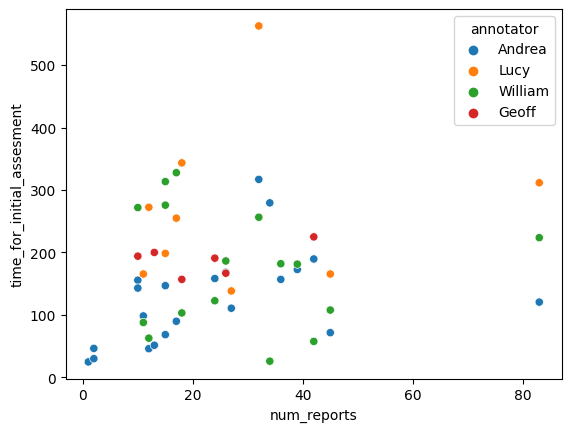

In [16]:
import seaborn as sns
sns.scatterplot(data=processed_df, x='num_reports', y='time_for_initial_assesment', hue='annotator')

In [17]:
evidence_df.keys()

Index(['annotator', 'model_type', 'sort_type', 'instance_index', 'notes',
       'query', 'day', 'evidence_was_seen', 'cancer impact',
       'pneumonia impact', 'pulmonary edema impact', 'cancer relevance',
       'pneumonia relevance', 'pulmonary edema relevance', 'avg_impact',
       'Usefulness', 'Not Relevant', 'Weak Correlation', 'Useful',
       'Very Useful', 'count', 'model'],
      dtype='object')

In [18]:
evidence_df

,annotator,model_type,sort_type,instance_index,notes,query,day,evidence_was_seen,cancer impact,pneumonia impact,...,pneumonia relevance,pulmonary edema relevance,avg_impact,Usefulness,Not Relevant,Weak Correlation,Useful,Very Useful,count,model
0,Andrea,llm_evidence,LLM Confidence,49,Only one piece of relevant evidence because hu...,cancer (diagnosis),-387,Yes,Yes,Yes,...,1,1,1.0,1,0,1,0,0,1,"('llm_evidence', 'LLM Confidence')"
1,Andrea,llm_evidence,LLM Confidence,51,,pulmonary edema (diagnosis),0,Yes,NaN,No,...,1,1,0.0,1,0,1,0,0,1,"('llm_evidence', 'LLM Confidence')"
2,Andrea,llm_evidence,LLM Confidence,51,,pneumonia (diagnosis),0,NaN,NaN,NaN,...,0,0,NaN,0,1,0,0,0,1,"('llm_evidence', 'LLM Confidence')"
3,Andrea,llm_evidence,LLM Confidence,52,,pulmonary edema (diagnosis),-15,NaN,NaN,NaN,...,0,0,NaN,0,1,0,0,0,1,"('llm_evidence', 'LLM Confidence')"
4,Andrea,llm_evidence,LLM Confidence,52,,tiredness (risk factor),-15,NaN,NaN,NaN,...,0,0,NaN,0,1,0,0,0,1,"('llm_evidence', 'LLM Confidence')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Lucy,llm_evidence,Sort by MSE with the bias logits,84,,cancer (diagnosis),-335,Yes,Yes,NaN,...,0,0,1.0,1,0,1,0,0,1,"('llm_evidence', 'Sort by MSE with the bias lo..."
125,Lucy,llm_evidence,Sort by MSE with the bias logits,84,"Kind of a weird statement to make, almost like...",cancer (diagnosis),-336,No,No,NaN,...,0,0,0.0,1,0,1,0,0,1,"('llm_evidence', 'Sort by MSE with the bias lo..."
126,Lucy,llm_evidence,LLM Confidence,86,,a heart attack (risk factor),-1,NaN,NaN,NaN,...,0,0,NaN,0,1,0,0,0,1,"('llm_evidence', 'LLM Confidence')"
127,Lucy,llm_evidence,LLM Confidence,86,,neuralogical problems (risk factor),0,NaN,NaN,NaN,...,0,0,NaN,0,1,0,0,0,1,"('llm_evidence', 'LLM Confidence')"


In [58]:
def plot_evidence_stacked(evidence_df, filename=None, ax=None, percent=True, horizontal=True):
    df_stacked = evidence_df.groupby(['model'])[
        ['Not Relevant', 'Weak Correlation', 'Useful', 'Very Useful', 'count']].agg(np.sum).reset_index()
    models = {'llm_evidence': 'LLM Evidence', 'all_sentences': 'Raw EHR'}
    sort_methods = {'Sort by MSE with the bias logits': 'Log Odds Sorting', 'LLM Confidence': 'Confidence Sorting'}
    df_stacked['Model'] = df_stacked['model'].apply(lambda x: models[eval(x)[0]]+'\n+'+sort_methods[eval(x)[1]])
    df_stacked = df_stacked.set_index('Model')
    ratings = ['Very Useful', 'Useful', 'Weak Correlation', 'Not Relevant']
    if percent:
        for x in ratings:
            df_stacked[x] = df_stacked.apply(lambda r: 100 * r[x] / r['count'], axis=1)
    df_stacked = pd.concat([
        df_stacked[df_stacked.index=='LLM Evidence\n+Log Odds Sorting'],
        df_stacked[df_stacked.index=='Raw EHR\n+Log Odds Sorting'],
        df_stacked[df_stacked.index=='LLM Evidence\n+Confidence Sorting'],
    ])
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4.8, 3))
    df_stacked_temp = df_stacked.copy()
    if percent:
        df_stacked_temp = df_stacked_temp.rename(index={
            k: f'{k}\n(n={int(v)})' for k, v in df_stacked['count'].to_dict().items()})
    chart = df_stacked_temp[
        ['Very Useful', 'Useful', 'Weak Correlation', 'Not Relevant']].plot(
        kind='barh' if horizontal else 'bar', stacked=True,
        color=sns.color_palette("coolwarm", 4),
        width=0.75,
        ax=ax)
    measure = 'Evidence Percent' if percent else 'Evidence Count'
    chart.set_ylabel('' if horizontal else measure)
    chart.set_xlabel(measure if horizontal else '')
    chart.legend(
        prop={'size': 11}, ncol=2, loc="upper center",
        bbox_to_anchor=(0.4, 1.25), frameon=False)
    if horizontal:
        chart.set_yticklabels(
            chart.get_yticklabels(),
            horizontalalignment='left',
            # weight='bold',
            fontsize=11,
        )
        yax = ax.get_yaxis()
        pad = max(T.label1.get_window_extent().width-35 for T in yax.majorTicks)
        yax.set_tick_params(pad=pad)
        if percent:
            chart.axis([0, 100, -.4, 3-.6])
        plt.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left=False,)
    else:
        chart.set_xticklabels(
            chart.get_xticklabels(),
            horizontalalignment='right',
            # weight='bold',
            rotation=15,
            fontsize=11,
        )
        if percent:
            chart.axis([-.4, 3-.6, 0, 100])
    # chart.set_xticks([])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if not os.path.exists('figures'):
        os.makedirs("figures")
    if ax is None:
        fig.tight_layout()
        if filename is not None:
            fig.savefig(filename)

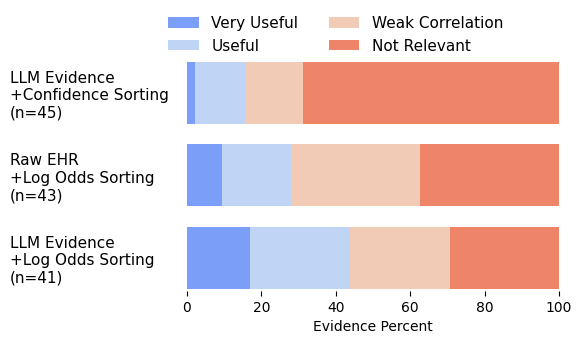

In [59]:
plot_evidence_stacked(evidence_df, filename='figures/model_evidence.pdf')

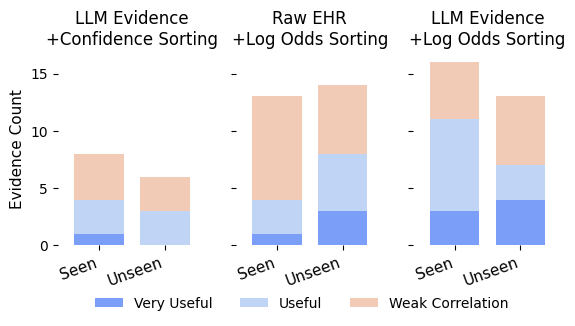

In [125]:
fig, axs = plt.subplots(1, 3, figsize=(6.5, 2.5), sharey=True)
df_stacked = evidence_df[~evidence_df.evidence_was_seen.isna()].groupby(['model', 'evidence_was_seen'])[
        ['Weak Correlation', 'Useful', 'Very Useful']].agg(np.sum).reset_index()
models = {'llm_evidence': 'LLM Evidence', 'all_sentences': 'Raw EHR'}
sort_methods = {'Sort by MSE with the bias logits': 'Log Odds Sorting', 'LLM Confidence': 'Confidence Sorting'}
df_stacked['Model'] = df_stacked['model'].apply(lambda x: models[eval(x)[0]]+'\n+'+sort_methods[eval(x)[1]])
df_stacked['seen_vs_unseen'] = df_stacked['evidence_was_seen'].apply(lambda x: 'Seen' if x=='Yes' else 'Unseen')
df_stacked = pd.concat([df_stacked[df_stacked.seen_vs_unseen == x] for x in ['Seen', 'Unseen']])
df_stacked = df_stacked.set_index('seen_vs_unseen')
ratings = ['Very Useful', 'Useful', 'Weak Correlation']
for i, model in enumerate(['LLM Evidence\n+Confidence Sorting', 'Raw EHR\n+Log Odds Sorting',
              'LLM Evidence\n+Log Odds Sorting']):
    df_stacked_temp = df_stacked[df_stacked.Model == model]
    chart = df_stacked_temp[
        ['Very Useful', 'Useful', 'Weak Correlation']].plot(
        kind='bar', stacked=True,
        color=sns.color_palette("coolwarm", 4),
        width=0.75,
        ax=axs[i])
    chart.set_ylabel('Evidence Count', fontsize=11)
    chart.set_xlabel('')
    chart.spines['right'].set_visible(False)
    chart.spines['top'].set_visible(False)
    chart.spines['left'].set_visible(False)
    chart.spines['bottom'].set_visible(False)
    chart.get_legend().remove()
    chart.set_xticklabels(
        chart.get_xticklabels(),
        horizontalalignment='right',
        # weight='bold',
        rotation=20,
        fontsize=11,
    )
    # chart.set_ylim(0, 20)
    chart.set_title(model)
# axs[1].legend(
#             prop={'size': 11}, ncol=3, loc="upper center",
#             bbox_to_anchor=(.5, -.2), frameon=False)
handles, labels = axs[2].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='lower center', ncols=3, frameon=False, bbox_to_anchor=(.5, -.2))
fig.savefig('figures/seen_vs_unseen_evidence.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [130]:
processed_df.num_annotated_evidence.mean()

3.0

In [131]:
processed_df.keys()

Index(['annotator', 'instance_index', 'num_reports', 'model_type', 'sort_type',
       'prediction_aligns', 'time_for_initial_assesment', 'cancer in future',
       'pneumonia in future', 'pulmonary edema in future',
       'num_annotated_evidence', 'is_duplicate', 'notes', 'score', 'evidence',
       'query', 'day', 'report_number', 'evidence_was_seen',
       'cancer relevance', 'cancer impact', 'pneumonia relevance',
       'pneumonia impact', 'pulmonary edema relevance',
       'pulmonary edema impact', 'cancer', 'pneumonia', 'pulmonary edema',
       'cancer(changed)', 'pneumonia(changed)'],
      dtype='object')

In [155]:
# processed_df_temp = processed_df.copy()
# processed_df_temp['Instances Seen'] = [1] * len(processed_df_temp)
# processed_df_temp = processed_df_temp.groupby(['annotator', 'model_type', 'sort_type']).agg(
#     {'count': np.sum, 'num_annotated_evidence': np.sum, 'num_reports': np.sum})
# processed_df_temp
instance_num_reports = {}
for i, row in processed_df.iterrows():
    instance_num_reports[row['instance_index']] = row['num_reports']
print(instance_num_reports)
evidence_df_temp = evidence_df.copy()
evidence_df_temp['Percent Useful'] = evidence_df_temp['Usefulness'].apply(
    lambda x: x if x != x else 100 if x >= 2 else 0)
evidence_df_temp = evidence_df_temp.groupby(['annotator', 'model']).agg({
    'count': np.sum,
    'instance_index': lambda x: set(x),
    'Usefulness': np.mean,
    'Percent Useful': np.mean,
})
evidence_df_temp['Instances'] = evidence_df_temp['instance_index'].apply(
    lambda x: len(x))
evidence_df_temp['Reports'] = evidence_df_temp['instance_index'].apply(
    lambda x: sum([instance_num_reports[i] for i in x]))
evidence_df_temp = evidence_df_temp.reset_index().rename(
    columns={'count': 'Evidence', 'Usefulness': 'Avg. Usefulness'})
evidence_df_temp = evidence_df_temp[['annotator', 'model', 'Instances', 'Evidence', 'Reports', 'Avg. Usefulness', 'Percent Useful']]
evidence_df_temp

{49: 26, 50: 42, 51: 1, 52: 2, 53: 2, 54: 24, 66: 12, 68: 10, 75: 11, 84: 17, 86: 15, 94: 34, 0: 32, 62: 18, 97: 83, 105: 45, 107: 27, 111: 39, 117: 15, 121: 36, 127: 10, 135: 13}


,annotator,model,Instances,Evidence,Reports,Avg. Usefulness,Percent Useful
0,Andrea,"('all_sentences', 'Sort by MSE with the bias l...",5,14,81,0.500000,7.142857
1,Andrea,"('llm_evidence', 'LLM Confidence')",8,20,195,0.250000,5.000000
2,Andrea,"('llm_evidence', 'Sort by MSE with the bias lo...",6,13,154,1.153846,30.769231
3,Geoff,"('all_sentences', 'Sort by MSE with the bias l...",3,7,54,1.285714,42.857143
4,Geoff,"('llm_evidence', 'LLM Confidence')",2,6,55,0.166667,0.000000
5,Lucy,"('all_sentences', 'Sort by MSE with the bias l...",2,5,72,1.000000,40.000000
6,Lucy,"('llm_evidence', 'LLM Confidence')",2,6,26,1.000000,50.000000
7,Lucy,"('llm_evidence', 'Sort by MSE with the bias lo...",5,14,162,1.357143,50.000000
8,William,"('all_sentences', 'Sort by MSE with the bias l...",6,17,224,1.294118,35.294118
9,William,"('llm_evidence', 'LLM Confidence')",4,13,105,0.769231,23.076923


In [159]:
evidence_df_temp_agg = evidence_df_temp.groupby(['model']).agg({
    'Instances': np.sum,
    'Evidence': np.sum,
    'Reports': np.sum,
    'Avg. Usefulness': np.mean,
    'Percent Useful': np.mean,
})
evidence_df_temp_agg

,Instances,Evidence,Reports,Avg. Usefulness,Percent Useful
model,,,,,
"('all_sentences', 'Sort by MSE with the bias logits')",16,43,431,1.019958,31.323529
"('llm_evidence', 'LLM Confidence')",16,45,381,0.546474,19.519231
"('llm_evidence', 'Sort by MSE with the bias logits')",16,41,435,1.313187,43.589744


In [163]:
annotators = {
    '1': 'Andrea',
    '2': 'Lucy',
    '3': 'William',
    '4': 'Geoff',
}
models = {
    'LLM Evidence+Confidence Sorting': ('llm_evidence', 'LLM Confidence'),
    'Raw EHR+Log Odds Sorting': ('all_sentences', 'Sort by MSE with the bias logits'),
    'LLM Evidence+Log Odds Sorting': ('llm_evidence', 'Sort by MSE with the bias logits'),
}
measurements = {
    'Inst.': 'Instances',
    'Evid.': 'Evidence',
    'Rep.': 'Reports',
    'Percent Useful': 'Percent Useful',
}
latex_table = ""
for i, (model, model_key) in enumerate(models.items()):
    latex_table += "& \\multicolumn{4}{c"
    if i < len(models) - 1:
        latex_table += "|"
    latex_table += "}{" + model + "} "
latex_table += "\\\\\nAnnotator "
for model, model_key in models.items():
    for measurement_name, measurement_key in measurements.items():
        latex_table += f"& {measurement_name} "
latex_table += "\\\\\n\hline\n"
for annotator, ann_key in annotators.items():
    latex_table += f"{annotator} "
    for model, model_key in models.items():
        rows = evidence_df_temp[
            (evidence_df_temp.annotator == ann_key) &
            (evidence_df_temp.model == str(model_key))]
        for measurement_name, measurement_key in measurements.items():
            if len(rows) == 0:
                latex_table += "& - "
            else:
                measurement = rows.iloc[0][measurement_key]
                if isinstance(measurement, float):
                    latex_table += "& {:.1f} ".format(measurement)
                else:
                    latex_table += "& {} ".format(measurement)
    latex_table += "\\\\\n"
latex_table += "\hline\nAggregated "
for model, model_key in models.items():
    measurements_agg = evidence_df_temp_agg.loc[str(model_key)]
    for measurement_name, measurement_key in measurements.items():
        measurement = measurements_agg[measurement_key]
        if measurement_name in ['Percent Useful']:
            latex_table += "& {:.1f} ".format(measurement)
        else:
            latex_table += "& {} ".format(int(measurement))
latex_table += "\\\\\n"
print(latex_table)

& \multicolumn{4}{c|}{LLM Evidence+Confidence Sorting} & \multicolumn{4}{c|}{Raw EHR+Log Odds Sorting} & \multicolumn{4}{c}{LLM Evidence+Log Odds Sorting} \\
Annotator & Inst. & Evid. & Rep. & Percent Useful & Inst. & Evid. & Rep. & Percent Useful & Inst. & Evid. & Rep. & Percent Useful \\
\hline
1 & 8 & 20 & 195 & 5.0 & 5 & 14 & 81 & 7.1 & 6 & 13 & 154 & 30.8 \\
2 & 2 & 6 & 26 & 50.0 & 2 & 5 & 72 & 40.0 & 5 & 14 & 162 & 50.0 \\
3 & 4 & 13 & 105 & 23.1 & 6 & 17 & 224 & 35.3 & 5 & 14 & 119 & 50.0 \\
4 & 2 & 6 & 55 & 0.0 & 3 & 7 & 54 & 42.9 & - & - & - & - \\
\hline
Aggregated & 16 & 45 & 381 & 19.5 & 16 & 43 & 431 & 31.3 & 16 & 41 & 435 & 43.6 \\



In [146]:
from collections import Counter, defaultdict
query_counts = defaultdict(lambda : Counter())
for i, row in processed_df.iterrows():
    relevance_keys = [k for k in row.keys() if k.endswith(' relevance')]
    if row[relevance_keys[0]] == row[relevance_keys[0]] and \
            row['query'] == row['query']:
        for x in zip(row['query'], *[row[k] for k in relevance_keys]):
            query_counts[x[0]][max(x[1:])] += 1
query_counts = pd.DataFrame(query_counts).transpose()
query_counts

,1,3,2,0
cancer (diagnosis),7.0,3.0,2.0,4.0
pulmonary edema (diagnosis),2.0,1.0,NaN,4.0
pneumonia (diagnosis),4.0,2.0,5.0,1.0
tiredness (risk factor),NaN,1.0,NaN,4.0
a low ejection fraction (risk factor),3.0,NaN,5.0,5.0
neuralogical problems (risk factor),1.0,1.0,1.0,10.0
a history of smoking (risk factor),NaN,NaN,NaN,1.0
jaundice (risk factor),NaN,NaN,NaN,1.0
a compromised immune system (risk factor),NaN,NaN,2.0,1.0
large neck lymph nodes (risk factor),1.0,NaN,NaN,2.0


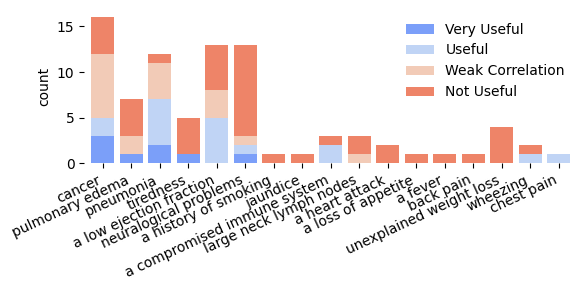

In [147]:
fig, axs = plt.subplots(1, 1, figsize=(6, 3))
chart = query_counts.rename(
    columns={0: 'Not Useful', 1: 'Weak Correlation', 2: 'Useful', 3: 'Very Useful'},
    index=lambda x: x.split(' (')[0],
    )[['Very Useful', 'Useful', 'Weak Correlation', 'Not Useful']].plot(
    kind='bar', stacked=True, color=sns.color_palette("coolwarm", 4),
    width=0.8,
    ax=axs)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['bottom'].set_visible(False)
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=25,
    horizontalalignment='right'
)
chart.legend(frameon=False)
chart.set_ylabel('count')
fig.tight_layout()
fig.savefig('figures/query_usefulness.pdf')